## Seaborn 画图

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# sns.set_style("whitegrid")
tips = sns.load_dataset("tips")

In [2]:
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


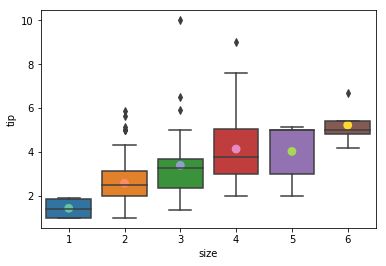

In [3]:
ax = sns.boxplot(x="size", y="tip", data=tips)
ax = sns.pointplot(x="size",y='tip',data=tips,palette="Set2",errwidth=0)

In [4]:
# 画图方法

def compare_plot(*data):
    f, axes = plt.subplots(len(set(merge_csv1['chr']))+1, 2, figsize=(7, 7), sharex=True)
    sns.despine(left=True)

    for n,da in enumerate(data):
        sns.distplot(da[da['pool']=='POOL=1']['depth'], kde=True,label='pool1-all',ax=axes[0,n])
        sns.distplot(da[da['pool']=='POOL=2']['depth'], kde=True,label='pool2-all',ax=axes[0,n])    
        axes[0,n].legend()
        for j,i in enumerate(set(da['chr'])):
            sns.distplot(da[(da['pool']=='POOL=1') & (da['chr']==i)]['depth'], 
                              kde=True,label='pool1-chr{}'.format(i),ax=axes[j+1,n])
            sns.distplot(da[(da['pool']=='POOL=2') &(da['chr']==i)]['depth'], 
                              kde=True,label='pool2-chr{}'.format(i),ax=axes[j+1,n])
            axes[j+1,n].legend()

第一列是分pool进行标准化，第二列为不分pool


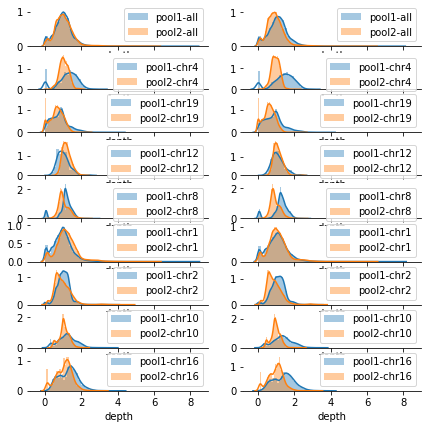

In [5]:
merge_csv1 = pd.read_csv('./demo_data/twopoolmerge.csv')
merge_csv1.columns=['tag','loc','pool','depth']
merge_csv1['chr-temp'] = merge_csv1['loc'].str.split(':')
merge_csv1['chr'] = merge_csv1['chr-temp'].str.get(0)
# print(merge_csv[''])

merge_csv2 = pd.read_csv('./demo_data/onePool.csv')
merge_csv2.columns=['tag','loc','depth','pool']
merge_csv2['chr-temp'] = merge_csv2['loc'].str.split(':')
merge_csv2['chr'] = merge_csv2['chr-temp'].str.get(0)
print('第一列是分pool进行标准化，第二列为不分pool')
compare_plot(merge_csv1,merge_csv2)

Text(1.5,5,'LDLR')

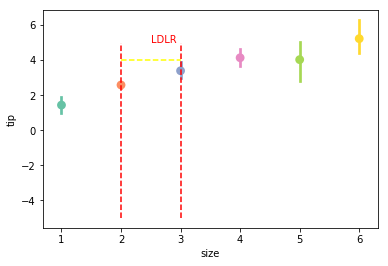

In [6]:
ax = sns.pointplot(x="size",y='tip',data=tips,palette="Set2")
ax.plot([1,1],[-5,5],'--',color='red')
ax.plot([2,2],[-5,5],'--',color='red')
ax.plot([1,2],[4,4],'--',color='yellow')
ax.text(x=1.5,y=5,s='LDLR',color='red')

## Draw pdf or density

In [7]:
def draw_density(data,title,value):
    ax=sns.distplot(data[value],kde=True)
    ax.set_title(title)
    fig = ax.get_figure()
    fig.savefig('./demo_data/hist.png') 

        chr       loc     depth
0  1.830582  1.484307 -0.194657
1  0.070219 -0.353360  0.809828
2  0.950507  0.075705 -0.188418
3 -0.380868  0.493880  0.336338
4 -2.292846 -0.104605 -1.125550


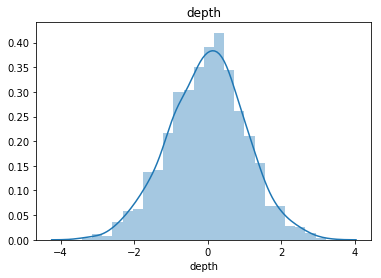

In [8]:
import numpy as np
data=pd.DataFrame(np.random.normal(0,1,(1000,3)),columns=['chr','loc','depth'])
print(data.head())
draw_density(data,'depth','depth')

In [9]:
import statsmodels.api as sm
data=pd.DataFrame(np.random.normal(0,1,(10000,4)),columns=['C','CHH','CG','CHG'])
ecdf = sm.distributions.ECDF(data['C'])
x = np.linspace(min(data['C']), max(data['C']))
y1 = ecdf(x)
ecdf = sm.distributions.ECDF(data['CHH'])
y2 = ecdf(x)
print(y1,y2)

[1.000e-04 2.000e-04 5.000e-04 5.000e-04 8.000e-04 1.300e-03 1.800e-03
 3.200e-03 4.700e-03 6.900e-03 1.020e-02 1.610e-02 2.470e-02 3.490e-02
 4.650e-02 6.200e-02 7.910e-02 1.044e-01 1.350e-01 1.680e-01 2.037e-01
 2.509e-01 3.037e-01 3.545e-01 4.106e-01 4.711e-01 5.289e-01 5.891e-01
 6.438e-01 6.975e-01 7.477e-01 7.951e-01 8.338e-01 8.683e-01 8.989e-01
 9.251e-01 9.443e-01 9.590e-01 9.688e-01 9.773e-01 9.835e-01 9.884e-01
 9.921e-01 9.944e-01 9.964e-01 9.974e-01 9.984e-01 9.992e-01 9.994e-01
 1.000e+00] [0.000e+00 0.000e+00 0.000e+00 3.000e-04 9.000e-04 1.700e-03 2.500e-03
 3.600e-03 5.300e-03 7.000e-03 1.100e-02 1.570e-02 2.290e-02 3.240e-02
 4.670e-02 6.330e-02 8.450e-02 1.104e-01 1.394e-01 1.762e-01 2.148e-01
 2.612e-01 3.126e-01 3.657e-01 4.233e-01 4.810e-01 5.407e-01 5.976e-01
 6.523e-01 7.030e-01 7.526e-01 7.983e-01 8.416e-01 8.758e-01 9.040e-01
 9.250e-01 9.429e-01 9.587e-01 9.707e-01 9.791e-01 9.856e-01 9.903e-01
 9.940e-01 9.966e-01 9.983e-01 9.985e-01 9.993e-01 9.997e-01 9.99

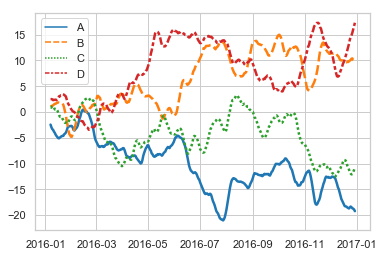

In [10]:
sns.set(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

## 多种数据类型

看如何合适的表示

In [19]:
mytype = np.random.randint(1,4,20)
mydepth = np.random.randint(2,200,20)
mypercentage=np.random.rand(20)
mycontext = np.random.randint(1,3,20)
print(mytype,mydepth,mypercentage,mycontext)

[3 3 2 3 3 2 1 1 2 2 2 1 1 2 3 1 1 1 3 3] [149  37  76 145 151  72  81 198  24 128  32  69 104  81 122  89 180  94
 143   8] [0.07961985 0.54351226 0.27090497 0.69444646 0.07147844 0.11180451
 0.17997971 0.65979193 0.92340748 0.58705626 0.82199916 0.92005726
 0.54059446 0.21502946 0.93083003 0.73497614 0.22972774 0.57602776
 0.80886044 0.24330182] [1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 2 2 1 2]


In [22]:
pd_data = pd.DataFrame(mytype,columns=['type'])
pd_data['depth']=mydepth
pd_data['percentage']=mypercentage
pd_data['context']=mycontext
print(pd_data)

    type  depth  percentage  context
0      3    149    0.079620        1
1      3     37    0.543512        1
2      2     76    0.270905        1
3      3    145    0.694446        1
4      3    151    0.071478        1
5      2     72    0.111805        2
6      1     81    0.179980        1
7      1    198    0.659792        2
8      2     24    0.923407        1
9      2    128    0.587056        1
10     2     32    0.821999        1
11     1     69    0.920057        1
12     1    104    0.540594        1
13     2     81    0.215029        2
14     3    122    0.930830        1
15     1     89    0.734976        1
16     1    180    0.229728        2
17     1     94    0.576028        2
18     3    143    0.808860        1
19     3      8    0.243302        2


In [42]:
pd_data['context'][pd_data['context'] == 1] = 'CpG'
pd_data['context'][pd_data['context'] == 2] = 'CHH'
pd_data['type'][pd_data['type'] == 1] = 'cgi'
pd_data['type'][pd_data['type'] == 2] = 'promoter'
pd_data['type'][pd_data['type'] == 3] = 'nothing'
print(pd_data)

        type  depth  percentage context
0    nothing    149    0.079620     CpG
1    nothing     37    0.543512     CpG
2   promoter     76    0.270905     CpG
3    nothing    145    0.694446     CpG
4    nothing    151    0.071478     CpG
5   promoter     72    0.111805     CHH
6        cgi     81    0.179980     CpG
7        cgi    198    0.659792     CHH
8   promoter     24    0.923407     CpG
9   promoter    128    0.587056     CpG
10  promoter     32    0.821999     CpG
11       cgi     69    0.920057     CpG
12       cgi    104    0.540594     CpG
13  promoter     81    0.215029     CHH
14   nothing    122    0.930830     CpG
15       cgi     89    0.734976     CpG
16       cgi    180    0.229728     CHH
17       cgi     94    0.576028     CHH
18   nothing    143    0.808860     CpG
19   nothing      8    0.243302     CHH


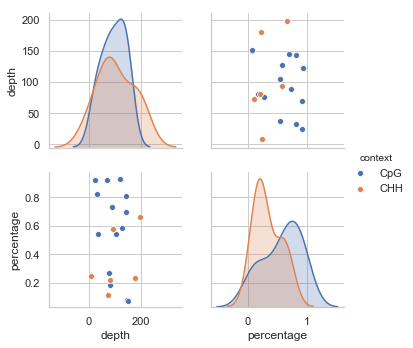

In [44]:
sns.pairplot(pd_data, hue="context")

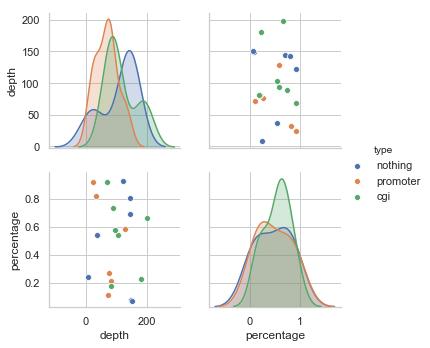

In [45]:
sns.pairplot(pd_data, hue="type")